In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

### find intersection point of 2 lines

In [1]:
from fractions import Fraction

def dec2frac(n):
    return str(Fraction(n).limit_denominator())

def intersect(L1, L2, verbose = True): # L1 coefficients of ax + by = c as a tuple (a,b,c)
    flag = [False]*2
    A1,B1,C1 = L1 #A1x + B1y = C1, A2x + B2y = C2
    A2,B2,C2 = L2
    
    if verbose:
        print('line 1: %f x + %f y = %f'%(A1,B1,C1))
        print('line 2: %f x + %f y = %f'%(A2,B2,C2))
    
    # find determinant
    det = A1*B2 - A2*B1

    if det==0: #parallel lines, no intersection point
        return -1,-1,-1
    else:
        x = (B2*C1 - B1*C2)/det + 0 # to make -0 -> +0
        if not x.is_integer():
            x1 = dec2frac(x)
            # x1 = format(x, '.2f') #limit decimal to 2 places
            flag[0] = True
        y = (A1*C2 - A2*C1)/det + 0 
        if not y.is_integer():
            y1 = dec2frac(y)
            # y1 = format(y, '.2f')
            flag[1] = True
        if all(f == False for f in flag):
            # x and y both whole numbers
            coord = '('+ str(x) +' ,'+ str(y)+')'
        elif flag[0] and not flag[1]:
            coord = '('+ str(x1) +' ,'+ str(y)+')'
        elif not flag[0] and flag[1]:
            coord = '('+ str(x) +' ,'+ str(y1) +')'
        else:
            coord = '('+ str(x1) +' ,'+ str(y1) +')'
        
        text = coord # The text of the annotation. 
        xy = (x,y) # The point (x,y) to annotate.
        xytext = (x,y) # The position (x,y) to place the text at.
        print('legend on graph: {}'.format(text))
        return text, xy, xytext

### plot lines from ax + by = c

In [3]:
def plot_lines(a,b,c,x):
    #x is a numpy array
    #ax + by = c
    if b == 0:
        y = x
    else:
        y = (c - a*x)/b
   
    # format of equation to be printed
    if a==1 and b!=1:
        eqn = 'x1 + {b}x2 = {c}'.format(b=b,c=c)
    if a!=1 and b==1:
        eqn = '{a}x1 + x2 = {c}'.format(a=a,c=c)
    if a == 0:
        if b!=1:
            eqn = '{b}x2 = {c}'.format(b=b,c=c)
        else:
            eqn = 'x2 = {c}'.format(c=c)
    if b == 0:
        if a != 1:
            eqn = '{a}x1 = {c}'.format(a=a,c=c)
        else:
            eqn = ' x1 = {c}'.format(c=c)
    if a!=0 and a!=1 and b!=0 and b!=1:
        eqn = '{a}x1 + {b}x2 = {c}'.format(a=a,b=b,c=c)
    
    if a == 1 and b == 1:
        eqn = 'x1 + x2 = {c}'.format(c=c)
        
        
    return y,eqn

In [4]:
maximum = -999999
minimum = 999999
def findUpperBound(xy):
    global maximum
    x, y = xy
    if x > maximum:
        maximum = x
    if y > maximum:
        maximum = y
    return maximum

def findLowerBound(xy):
    global minimum
    x, y = xy
    if x < minimum:
        minimum = x
    if y < minimum:
        minimum = y
    return minimum

In [15]:
from functools import reduce
def plot_colour(lines,signs,filename='1.png'):
    # lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    # ub,lb: upper bound and lower bound for x axis
    # signs : 1 => greater than ; -1 = > less than, 0 => equal to
    fig, ax = plt.subplots(figsize=(10,12))
    ub = 5
    lb = 0
    lines.append([0,1,0])
    lines.append([1,0,0])
    all_combinations = list(itertools.combinations(lines, 2))
    for i in all_combinations:
        text, xy , xytext = intersect(i[0],i[1], verbose = False)
       
        if text != xy and xy != xytext and text != -1:
            ub = math.ceil(findUpperBound(xy))
            lb = math.ceil(findLowerBound(xy))
            ax.annotate( xy = xy, xytext = (-15, 25), textcoords='offset points')


    print("(lb,ub): {lb}, {ub} ".format(lb=lb, ub=ub))

    X = np.linspace(-10000, 10000, 10)
    
    
    lines = lines[:-2]
    
    plt.axis([lb, ub, lb, ub]) # [xmin, xmax, ymin, ymax]
 
    for [a,b,c] in lines:
        Y, e = plot_lines(a,b,c,X) #y-line, e-equation
        if b == 0:
            X_ = np.full(len(X),c)
            ax.plot(X_,Y,label=e)
  
        else:
            ax.plot(X,Y,label=e)

    list_ = []
  # https://stackoverflow.com/questions/57017444/how-to-visualize-feasible-region-for-linear-programming-with-arbitrary-inequali
    d = np.linspace(lb,ub,300)
    x,y = np.meshgrid(d,d)
    for i in range(len(signs)):
        a,b,c = lines[i]
        if signs[i] == -1: # -1 => less than
            constraint = (b*y <= -a*x + c)
            print(f'{b}*y <= {-a}*x + {c}')
        elif signs[i] == 1:
            constraint = (b*y >= -a*x + c)
            print(f'{b}*y >= {-a}*x + {c}')
        elif signs[i] == 0:
            constraint = (b*y == -a*x + c)
            print(f'{b}*y = {-a}*x + {c}')
                  
        list_.append(constraint)
   
    res = reduce(lambda x, y: x & y, list_) 
    
    
    print(len(res))
    print(np.nonzero(res.astype(int)))
    print(x.min(),x.max(),y.min(),y.max())
    plt.imshow(res.astype(int), extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Purples", alpha = 0.3)

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='dashdot')
    
    # Add a Legend
    plt.legend(loc='upper center')
    plt.savefig(filename)

legend on graph: (1.0 ,0.0)
legend on graph: (1.0 ,0.0)
legend on graph: (0.0 ,1.0)
legend on graph: (1.0 ,0.0)
legend on graph: (0.0 ,-1.0)
legend on graph: (0.0 ,0.0)
(lb,ub): 0, 5 
1*y = -1*x + 1
-1*y = -1*x + 1
300
(array([], dtype=int64), array([], dtype=int64))
0.0 5.0 0.0 5.0


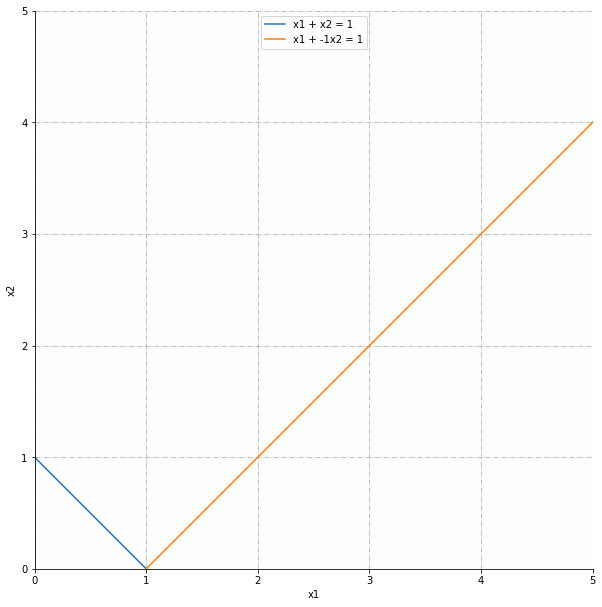

In [17]:
plot_colour([[ 1,1,1],[1,-1,1]],[0,0])

### plot from 2 points

In [22]:
def plot_from_point(P0, P1,ub,lb):
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    plt.axis([ub, lb, ub, lb])
    x1, y1 = P0[0], P0[1]
    x2, y2 = P1[0], P1[1]    
    num = y2 - y1
    den = x2 - x1
    if num == 0:
        y = y1
        
    
    elif den == 0:
        x = x1
    
    else:
        slope = num/den
        y = slope * (x - x1) + y1
        ax.plot(x,y)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='--')
    print('slope: ',slope)
    print('coefficient of x2: {}, x1: {}, c: {}'.format(1,-slope, -slope*x1+y1))


slope:  0.8
coefficient of x2: 1, x1: -0.8, c: -1.2000000000000002


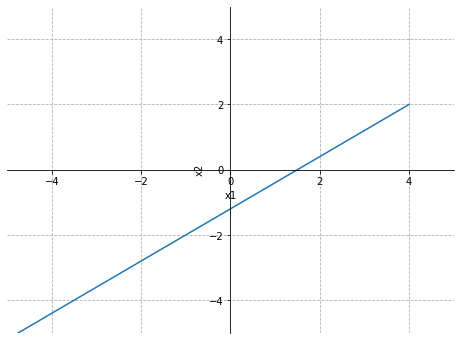

In [23]:
plot_from_point((9,6),(4,2),-5,5)